# Homework Assignment 1

In [96]:
import pandas as pd #first we'll need module pandas to work with the dataframes
%matplotlib inline

## Dataset 1. The 311 service requests (CSV) in Boston

The data contains all 311 call service requests, including their time, location, type of issue and many other details

Source https://data.boston.gov/dataset/311-service-requests

In [97]:
#lets specify the file location on the web
#we can actually upload the data directly from there!
#the data is provided by year, so consider the most recent full year available - 2019
fname = '311_service_requests_2020.csv'
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpxbo51van.csv'

In [98]:
boston311 = pd.read_csv(url) #upload the data

C:\Users\Mia15\AppData\Local\Temp\ipykernel_20888\2447529155.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  boston311 = pd.read_csv(url) #upload the data


In [99]:
#preview the data
boston311.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101003148265,2020-01-01 00:07:00,2020-01-13 03:30:00,2020-01-20 06:43:10,OVERDUE,Closed,Case Closed. Closed date : 2020-01-20 11:43:10...,Park Lights - Doherty Playground (BPRD),Parks & Recreation Department,Park Maintenance & Safety,...,Charlestown,2,2,0207,INTERSECTION S Quincy Pl & Saint Martin St,NaN,42.382987,-71.067828,0101000020E6100000ADA5774957C451C01A77A6B30531...,Citizens Connect App
1,101003148266,2020-01-01 00:54:48,2020-01-01 00:54:48,2020-01-02 01:11:49,OVERDUE,Closed,Case Closed. Closed date : 2020-01-02 06:11:49...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Dorchester,8,Ward 17,1702,85 Bloomfield St,2124.0,42.298900,-71.069541,0101000020E6100000E9E56F5A73C451C07E7212574226...,Citizens Connect App
2,101003148268,2020-01-01 01:14:13,2020-01-03 03:30:00,2020-01-01 10:05:46,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 15:05:46...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,South End,6,Ward 9,0901,423 Shawmut Ave,2118.0,42.340130,-71.074291,0101000020E6100000E2300A2DC1C451C0AAFE665D892B...,Citizens Connect App
3,101003148269,2020-01-01 01:19:00,2020-01-03 03:30:00,2020-01-02 01:10:56,ONTIME,Closed,Case Closed. Closed date : 2020-01-02 06:10:56...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Roxbury,13,Ward 12,1201,6 Moreland St,2119.0,42.325960,-71.082761,0101000020E61000006A0602F34BC551C0EB78EE0AB929...,Constituent Call
4,101003148271,2020-01-01 02:02:00,2020-01-03 03:30:00,2020-01-01 02:07:17,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 07:07:17...,Missed Trash: District 1B,Public Works Department,Sanitation,...,Beacon Hill,14,Ward 5,0503,25-29 Charles St,2114.0,42.356920,-71.069650,0101000020E61000001AD6442775C451C0A731108AAF2D...,Constituent Call


### Task 1. Count the number of neighborhoods (distinct names in "neighborhood" column), and visualize the number of complaints by neighborhood as a bar plot

In [100]:
len(boston311.neighborhood.unique())

25

In [101]:
boston311_clean=boston311.dropna(subset = "neighborhood")
len(boston311_clean.neighborhood.unique())

24

In [102]:
boston311_clean.neighborhood.unique()

array(['Charlestown', 'Dorchester', 'South End', 'Roxbury', 'Beacon Hill',
       'South Boston / South Boston Waterfront', 'Jamaica Plain',
       'Mission Hill', 'Downtown / Financial District', 'Roslindale',
       'Greater Mattapan', 'East Boston', 'West Roxbury', 'Hyde Park',
       'Back Bay', 'Allston / Brighton', 'Allston', ' ', 'Boston',
       'Fenway / Kenmore / Audubon Circle / Longwood', 'South Boston',
       'Brighton', 'Mattapan', 'Chestnut Hill'], dtype=object)

In [103]:
boston311_clean["neighborhood"].value_counts()

Dorchester                                      38680
Roxbury                                         23813
South Boston / South Boston Waterfront          19966
Allston / Brighton                              17744
East Boston                                     16679
South End                                       16674
Jamaica Plain                                   13609
Hyde Park                                       13024
Downtown / Financial District                   12569
Greater Mattapan                                11093
Back Bay                                        11082
Charlestown                                      9314
West Roxbury                                     8984
Roslindale                                       8860
Boston                                           7218
Beacon Hill                                      5518
Fenway / Kenmore / Audubon Circle / Longwood     4367
Mission Hill                                     4158
                            

<Axes: xlabel='neighborhood'>

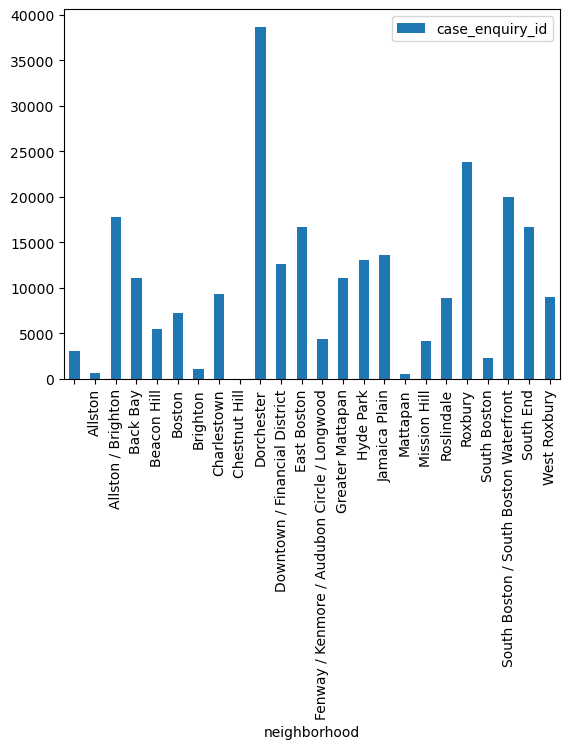

In [104]:
boston311_clean[['neighborhood','case_enquiry_id']].groupby(by=['neighborhood']).count().plot.bar()

## Dataset 2. Real-estate data sales (XLS)

The data contains information on all the residential real estate sold in NYC, including address of the house/unit, its size, age, time of sale and of course the price

In [105]:
#the data is split by year and borough. Take Brooklyn in 2015 
year=2015; boro='brooklyn'

In [106]:
fname=str(year)+'_'+boro+'.xls'

In [107]:
url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/'+str(year)+\
                                                                                       '/'+fname
# alternative URL
# url = '2015_brooklyn.xls'

In [108]:
re_sales = pd.read_excel(url)

In [109]:
re_sales.head()

,"BROOKLYN ANNUALIZE SALE FOR 2015. (All Sales From January 1, 2015 - December 31, 2015)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 3/31/2016. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name 4/1/16. Descriptive Data as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31 00:00:00


We'll need to skip first 4 lines to make it pandas-frienly 

And also consider alternative data ingestion approach: download to the local folder first and then upload from local drive

In [110]:
import urllib #use urllib mobule for web requests
dataDir='' #local data folder to use
urllib.request.urlretrieve(url,dataDir+fname)

('2015_brooklyn.xls', <http.client.HTTPMessage at 0x21782ae7110>)

In [111]:
#now upload the data, also skipping first 4 rows
re_sales = pd.read_excel(dataDir+fname,skiprows=4)

In [112]:
re_sales.head() #now the dataframe looks reasonable

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


### Task 2. 
Quantify the average price per square foot per zip code. Visualize result as a bar plot. Which zip codes are the three most expensive ones?

In [113]:
re_sales.columns

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [114]:
re_sales.describe()

,BOROUGH\n,BLOCK\n,LOT\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,SALE PRICE\n
count,25362.0,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,2.536200e+04
mean,3.0,4207.714534,281.084418,11217.017270,2.376981,0.185474,2.603817,2238.399456,2878.065649,1774.995584,1.699077,7.881901e+05
std,0.0,2649.487442,492.384071,186.770716,7.803233,2.711002,8.286863,6372.188724,10178.063689,542.988555,0.944152,3.198035e+06
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,3.0,1768.000000,21.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,0.000000e+00
50%,3.0,4149.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1900.000000,1744.500000,1929.000000,1.000000,3.300000e+05
75%,3.0,6540.000000,103.000000,11231.000000,2.000000,0.000000,2.000000,2500.000000,2880.000000,1957.000000,2.000000,8.130000e+05
max,3.0,8955.000000,9033.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08


In [115]:
re_sales.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [140]:
df=re_sales[re_sales["GROSS SQUARE FEET\n"]!=0]

In [141]:
df['aveprice_per_sf']=df['SALE PRICE\n']/df['GROSS SQUARE FEET\n']
df.head()

C:\Users\Mia15\AppData\Local\Temp\ipykernel_20888\3098151438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aveprice_per_sf']=df['SALE PRICE\n']/df['GROSS SQUARE FEET\n']


,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n,aveprice_per_sf
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,0,1,1547,1428,1930,1,A5,758000,2015-03-31,530.812325
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,0,1,1933,1660,1930,1,A5,778000,2015-06-15,468.674699
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,0,1,2417,2106,1930,1,A9,0,2015-09-16,0.000000
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,2,1900,2090,1931,1,S1,1365000,2015-05-29,653.110048
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,0,1,2417,1672,1930,1,A1,750000,2015-12-17,448.564593


In [142]:
df[["ZIP CODE\n","SALE PRICE\n","GROSS SQUARE FEET\n","aveprice_per_sf"]]

,ZIP CODE\n,SALE PRICE\n,GROSS SQUARE FEET\n,aveprice_per_sf
0,11228,758000,1428,530.812325
1,11228,778000,1660,468.674699
2,11214,0,2106,0.000000
3,11214,1365000,2090,653.110048
4,11214,750000,1672,448.564593
...,...,...,...,...
25345,11237,46040000,101712,452.650621
25346,11237,46000000,101712,452.257354
25347,11237,9000000,23250,387.096774
25348,11237,0,13500,0.000000


<Axes: xlabel='ZIP CODE\n'>

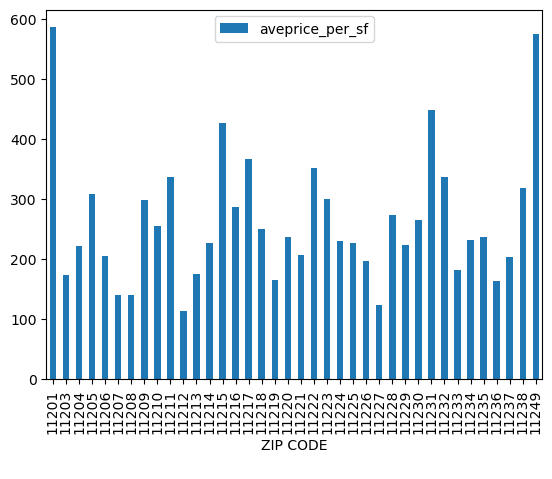

In [143]:
df[['ZIP CODE\n','aveprice_per_sf']].groupby(by=['ZIP CODE\n']).mean().plot.bar()

In [144]:
df[['ZIP CODE\n','aveprice_per_sf']].groupby(by=['ZIP CODE\n']).mean()

,aveprice_per_sf
ZIP CODE,
11201,586.747080
11203,172.862285
11204,222.483972
11205,307.836247
11206,205.674145
11207,139.798221
11208,140.619502
11209,299.135864
11210,254.981757


In [146]:
rS1=df[['ZIP CODE\n','aveprice_per_sf']].groupby(by=['ZIP CODE\n']).mean()
rS1.sort_values(by=['aveprice_per_sf'],ascending = False)

,aveprice_per_sf
ZIP CODE,
11201,586.747080
11249,575.747448
11231,449.018272
11215,426.634586
11217,367.247562
11222,351.779088
11232,337.259583
11211,336.271823
11238,318.123390


In [147]:
#Which zip codes are the three most expensive ones
rS3=rS1.sort_values(by=['aveprice_per_sf'],ascending = False)
rS3.iloc[0:3,:]

,aveprice_per_sf
ZIP CODE,
11201,586.747080
11249,575.747448
11231,449.018272


Hints: First, use "group_by" to create an aggregate with cumulative price and sq foot size and then add a new field through assignment dividing one by the other. 

You can use sort_values to order dataframe by price per zip code and see the top three zip codes.

Not mandatory, but if you want python to give you a specific list of the top three zip codes, you can use .iloc to slice it and get the index converting it to a list. But then make sure to ignore zip codes with infinite prices (likely due to zero house sizes).

## Dataset 3. Street Pavement Rating

The New York City Department of Transportation is responsible for keeping the City's streets in good repair. The Agency performs ongoing assessment of New York City streets. Ratings are based on a scale from 1 to 10, and results are grouped in the following categories: Good (%) - ratings of 8 to 10, Fair (%) - ratings of 4 to 7, and Poor (%) - ratings of 1 to 3. Rating dates started from 1994 to 2019. This data will allow you to create a map.

GeoJSON is a JSON based format designed to represent the geographical features with their non-spatial attributes. Besides GeoJSON, shapefile is also a common format for geographical datasets. For more information, please check https://geojson.org/.

As JSON contains spatial information (in this case shapes of the streets) along with the data, we'll need a slightly different vehicle to load it. There is a module geopandas which we'll use below. In short its just like pandas, but having a special column "geometry" which is meant to contain spatial info

In [123]:
!pip install geopandas

In [124]:
import geopandas as gpd
url = 'https://data.cityofnewyork.us/api/geospatial/2cav-chmn?method=export&format=GeoJSON'
# alternative URL
# url = 'https://github.com/CUSP2020PUI/Data/raw/master/Street%20Pavement%20Rating.geojson'
rating = gpd.read_file(url)

In [125]:
rating.shape #shape of the dataframe - first is the number of records (streets)

(81209, 13)

In [126]:
rating.head() #lets preview the data

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
0,0,0,969,609.854259468,0,5,L,2020,589.0,33.08,FAIR,2020-01-24,"MULTILINESTRING ((-74.21215 40.51645, -74.2119..."
1,0,0,983,257.932161624,0,9,NaN,2020,258.0,30.0,GOOD,2021-05-20,"MULTILINESTRING ((-74.20972 40.51892, -74.2106..."
2,0,0,999,379.637985455,0,3,NaN,2020,232.0,30.0,POOR,2019-10-01,"MULTILINESTRING ((-74.20649 40.51486, -74.2054..."
3,0,0,1018,50.2891638427,0,8,L,2020,75.0,34.58,GOOD,2019-10-01,"MULTILINESTRING ((-74.20882 40.51931, -74.2087..."
4,0,0,1050,786.400025432,0,5,NaN,2020,891.0,30.0,FAIR,2020-01-13,"MULTILINESTRING ((-74.20584 40.51791, -74.2047..."


### Task 3.
Visualize only the poorly maintained roads so we can zoom into those that need particular attention.

HINT: Filter the dataframe first using slicing by an appropriate condition on rating.rating_word

In [127]:
rating[rating['rating_word'] == 'POOR']

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
2,0,0,999,379.637985455,0,3,NaN,2020,232.0,30.0,POOR,2019-10-01,"MULTILINESTRING ((-74.20649 40.51486, -74.2054..."
57,0,0,5045,432.001157406,1,4,S,2022,434.0,34.5,POOR,2021-08-12,"MULTILINESTRING ((-74.16267 40.59432, -74.1636..."
94,0,0,401,267.839504181,0,3,L,2020,289.0,28.25,POOR,2019-07-31,"MULTILINESTRING ((-74.23871 40.51599, -74.2381..."
167,0,0,3021,644.643312228,0,3,L,2019,722.0,33.08,POOR,2019-04-04,"MULTILINESTRING ((-74.18151 40.52365, -74.1803..."
254,0,0,3993,471.428679654,0,3,L,2021,778.0,34.33,POOR,2020-10-15,"MULTILINESTRING ((-74.18692 40.55407, -74.1882..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80851,0,0,98376,79.1201617794,0,3,NaN,2017,62.0,30.0,POOR,2018-12-27,"MULTILINESTRING ((-73.76842 40.76364, -73.7683..."
80878,0,0,101009,432.486994024,0,3,L,2020,466.0,29.25,POOR,2020-01-27,"MULTILINESTRING ((-73.72722 40.73096, -73.7257..."
80999,0,0,101474,241.878068456,0,3,NaN,2021,222.0,30.0,POOR,2021-06-07,"MULTILINESTRING ((-73.74738 40.75296, -73.7471..."
81176,0,0,100519,521.01535486,0,2,L,2022,543.0,29.67,POOR,2021-07-27,"MULTILINESTRING ((-73.74296 40.72592, -73.7417..."


<Axes: >

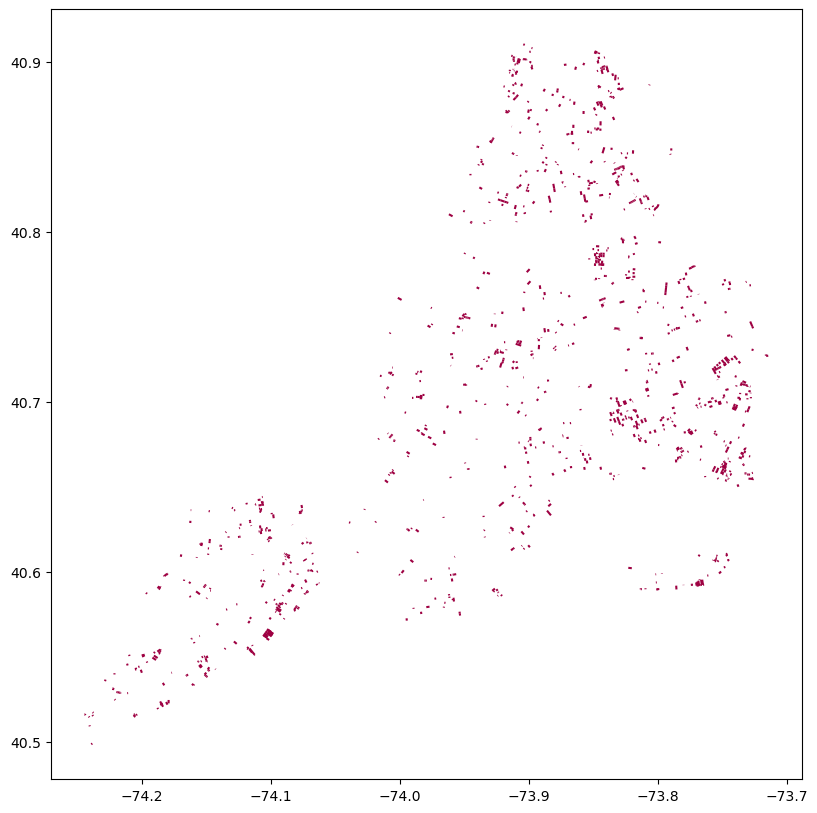

In [128]:
#Visualize only the poorly maintained roads so we can zoom into those that need particular attention.
RT1=rating[rating['rating_word'] == 'POOR']
RT1.plot(column='rating_word',cmap='Spectral',figsize=(10,10),)

### Dataset 4. COVID-19 Data by ZIP Code

This dataset includes confirmed case rates, case counts, death rates, death counts, and the percent of people tested with a positive result since March. Follwing download links refer to the dataset uploaded on Sep 1st. Dataset is provided by NYC health, please check https://www1.nyc.gov/site/doh/covid/covid-19-data.page for more information and other COVID19 related datasets.

### Task 4: 
    
    a) Aggregate dataset by Borough, calculate total cases amount in each Borough, and then visualize as a barplot
    
    b) Calculate borough-wise positive case percentage within all the tests administered within the borough (positivity rate among the tests), visualize as a barplot 
    
    c) Calculate borough-wise positive case percentage within the borough population (%% of population tested positive), and visualize as barplot. 
    
    Notice that both quantities b) and c) matter as otherwise the percentage of people tested positive might depend on the testing availability and practice which are not necessary consistent accross boroughs.


Hint: The column for case amount is “COVID_CASE_COUNT". Try groupby function in pandas to get total cases and tests by borough. Positive case percentage is ‘100*COVID_CASE_COUNT'/'TOTAL_COVID_TESTS'. To calculate positive case percentage, you might first need a borough level dataframe.

In [129]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/7953c97d1e58bbed9934ea04affb12ca74d9c0fb/data-by-modzcta.csv'
df = pd.read_csv(url)

In [130]:
df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,441,1871.58,23563.03,26,110.34,6.50,6786
1,10002,Chinatown/Lower East Side,Manhattan,1335,1739.29,76755.41,161,209.76,7.66,17439
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,543,1009.26,53801.62,35,65.05,3.53,15381
3,10004,Financial District,Manhattan,40,1095.71,3650.61,1,27.39,4.84,827
4,10005,Financial District,Manhattan,96,1143.39,8396.11,2,23.82,4.53,2117


In [131]:
df.columns

Index(['MODIFIED_ZCTA', 'NEIGHBORHOOD_NAME', 'BOROUGH_GROUP',
       'COVID_CASE_COUNT', 'COVID_CASE_RATE', 'POP_DENOMINATOR',
       'COVID_DEATH_COUNT', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE',
       'TOTAL_COVID_TESTS'],
      dtype='object')

In [132]:
#4a Aggregate dataset by Borough, calculate total cases amount in each Borough, and then visualize as a barplot
df[["BOROUGH_GROUP","COVID_CASE_COUNT"]].groupby(by = ["BOROUGH_GROUP"]).sum()

,COVID_CASE_COUNT
BOROUGH_GROUP,
Bronx,50914
Brooklyn,61442
Manhattan,28684
Queens,68202
Staten Island,14905


<Axes: xlabel='BOROUGH_GROUP'>

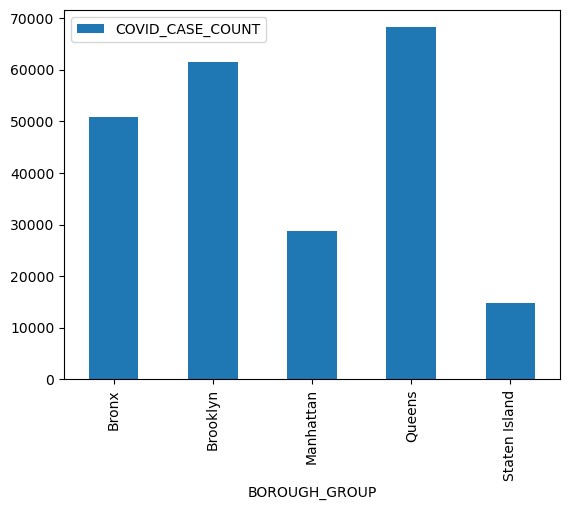

In [133]:
df[["BOROUGH_GROUP","COVID_CASE_COUNT"]].groupby(by = ["BOROUGH_GROUP"]).sum().plot.bar()

In [134]:
#b) Calculate borough-wise positive case percentage within all the tests administered within the borough 
#(positivity rate among the tests), visualize as a barplot 
df["positive_case"]=df["COVID_CASE_COUNT"]/df["TOTAL_COVID_TESTS"]
df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,positive_case
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,441,1871.58,23563.03,26,110.34,6.50,6786,0.064987
1,10002,Chinatown/Lower East Side,Manhattan,1335,1739.29,76755.41,161,209.76,7.66,17439,0.076553
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,543,1009.26,53801.62,35,65.05,3.53,15381,0.035303
3,10004,Financial District,Manhattan,40,1095.71,3650.61,1,27.39,4.84,827,0.048368
4,10005,Financial District,Manhattan,96,1143.39,8396.11,2,23.82,4.53,2117,0.045347


<Axes: xlabel='BOROUGH_GROUP'>

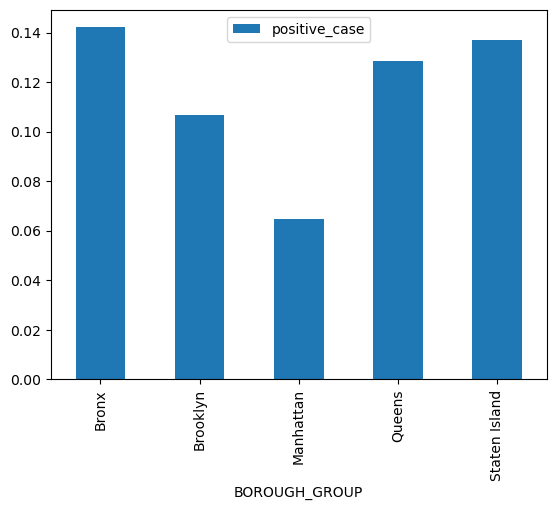

In [135]:
df[["positive_case","BOROUGH_GROUP"]].groupby(by=["BOROUGH_GROUP"]).mean().plot.bar()

In [136]:
#c) Calculate borough-wise positive case percentage within the borough population (%% of population tested positive), 
#and visualize as barplot.
df["positive_percentage"]=(df["COVID_CASE_COUNT"]/df["POP_DENOMINATOR"])*100
df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,positive_case,positive_percentage
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,441,1871.58,23563.03,26,110.34,6.50,6786,0.064987,1.871576
1,10002,Chinatown/Lower East Side,Manhattan,1335,1739.29,76755.41,161,209.76,7.66,17439,0.076553,1.739291
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,543,1009.26,53801.62,35,65.05,3.53,15381,0.035303,1.009263
3,10004,Financial District,Manhattan,40,1095.71,3650.61,1,27.39,4.84,827,0.048368,1.095707
4,10005,Financial District,Manhattan,96,1143.39,8396.11,2,23.82,4.53,2117,0.045347,1.143387


<Axes: xlabel='BOROUGH_GROUP'>

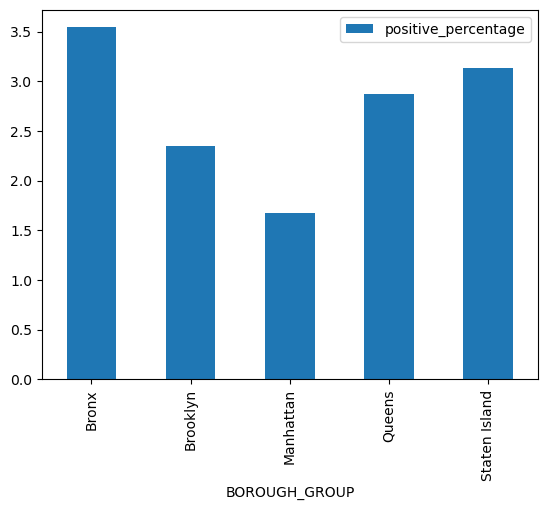

In [137]:
df[["positive_percentage","BOROUGH_GROUP"]].groupby(by=["BOROUGH_GROUP"]).mean().plot.bar()